# PIZZA SALES ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load dataset
data = pd.read_csv(r"C:\Users\MARVIE\Downloads\pizza_sales.csv")

In [4]:
data['order_date'] = pd.to_datetime(data['order_date'], dayfirst=True, errors='coerce')


In [5]:
data['MonthYear'] = data['order_date'].dt.strftime("%b %Y")   
data['MonthNum'] = data['order_date'].dt.month              
data['WeekdayName'] = data['order_date'].dt.day_name()        
data['WeekdayNum'] = data['order_date'].dt.weekday       
data['OrderHour'] = data['order_date'].dt.hour                


In [7]:
print(data.columns)


Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'MonthYear',
       'MonthNum', 'WeekdayName', 'WeekdayNum', 'OrderHour'],
      dtype='object')


In [8]:
# Create a Sales column
if 'sales' not in data.columns:
    data['sales'] = data['quantity'] * data['unit_price']  

In [9]:
#KPI
total_sales = data['sales'].sum()
total_orders = data['order_id'].nunique()
total_pizzas = data['quantity'].sum()
aov = total_sales / total_orders

print("====== Executive Overview ======")
print(f" Total Sales: ${total_sales:,.0f}")
print(f" Total Orders: {total_orders}")
print(f" Total Pizzas Sold: {total_pizzas}")
print(f" Average Order Value: ${aov:,.2f}\n")


====== Executive Overview ======
 Total Sales: $817,860
 Total Orders: 21350
 Total Pizzas Sold: 49574.0
 Average Order Value: $38.31



In [11]:
# Group by Year and Month Number 
sales_trend = data.groupby([data['order_date'].dt.to_period('M')])['sales'].sum().reset_index()

# Convert period back to timestamp for plotting
sales_trend['order_date'] = sales_trend['order_date'].dt.to_timestamp()

# Sort ascending by date
sales_trend = sales_trend.sort_values('order_date')


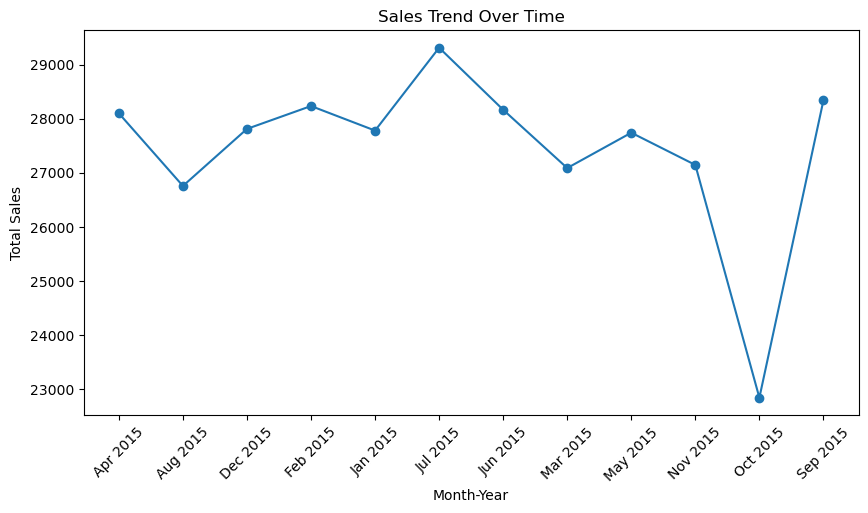

 Insight: Sales trend shows how revenue evolved month by month.



In [12]:
#1) Sales Trend Over Time
sales_trend = data.groupby('MonthYear')['sales'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(sales_trend['MonthYear'], sales_trend['sales'], marker='o')
plt.xticks(rotation=45)
plt.title("Sales Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.show()

print(" Insight: Sales trend shows how revenue evolved month by month.\n")


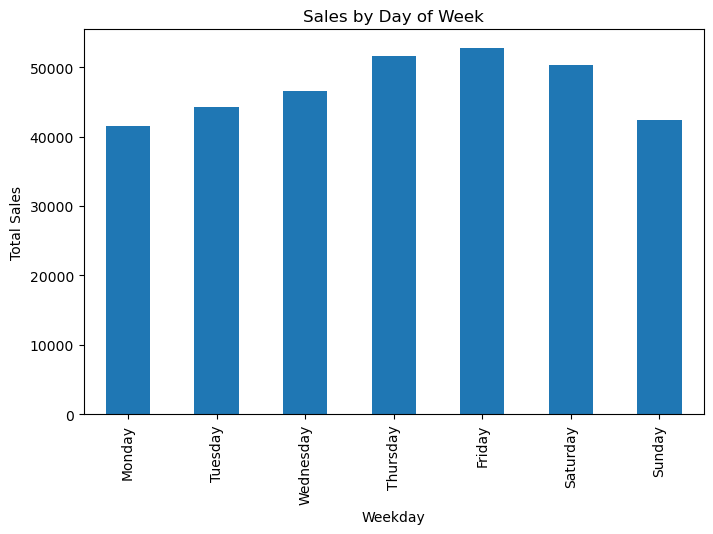

 Busiest Day: Friday ($52,791)
 Slowest Day: Monday ($41,574)



In [13]:
#2) Sales by Weekday
weekday_sales = data.groupby('WeekdayName')['sales'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(8,5))
weekday_sales.plot(kind='bar')
plt.title("Sales by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.show()

print(f" Busiest Day: {weekday_sales.idxmax()} (${weekday_sales.max():,.0f})")
print(f" Slowest Day: {weekday_sales.idxmin()} (${weekday_sales.min():,.0f})\n")


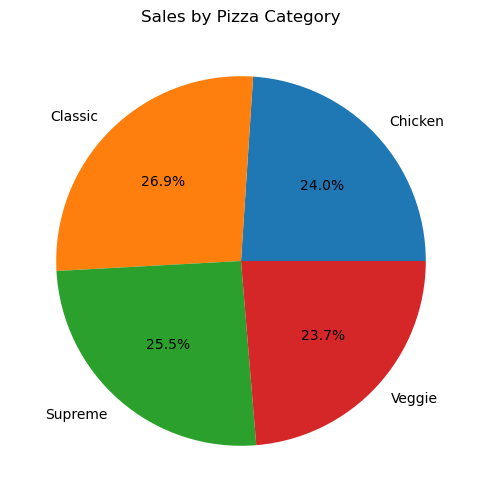

 Best Category: Classic ($220,053)
 Weakest Category: Veggie ($193,690)



In [14]:
#3) Sales by Pizza Category
category_sales = data.groupby('pizza_category')['sales'].sum()

plt.figure(figsize=(6,6))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales by Pizza Category")
plt.ylabel("")
plt.show()

print(f" Best Category: {category_sales.idxmax()} (${category_sales.max():,.0f})")
print(f" Weakest Category: {category_sales.idxmin()} (${category_sales.min():,.0f})\n")


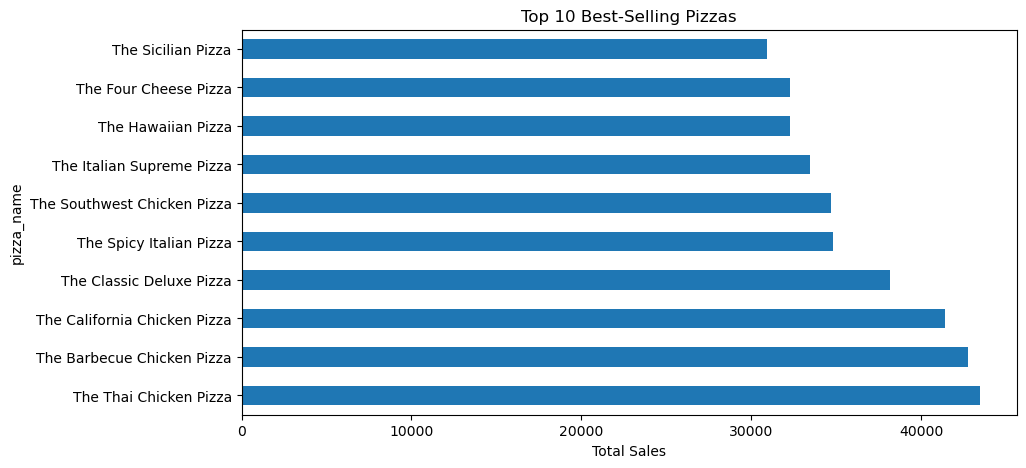

 Top Performers:
pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
The Southwest Chicken Pizza     34705.75
The Italian Supreme Pizza       33476.75
The Hawaiian Pizza              32273.25
The Four Cheese Pizza           32265.70
The Sicilian Pizza              30940.50
Name: sales, dtype: float64 



In [15]:
#4) Top 10 Best-Selling Pizzas
top10 = data.groupby('pizza_name')['sales'].sum().nlargest(10)

plt.figure(figsize=(10,5))
top10.plot(kind='barh')
plt.title("Top 10 Best-Selling Pizzas")
plt.xlabel("Total Sales")
plt.show()

print(" Top Performers:")
print(top10, "\n")


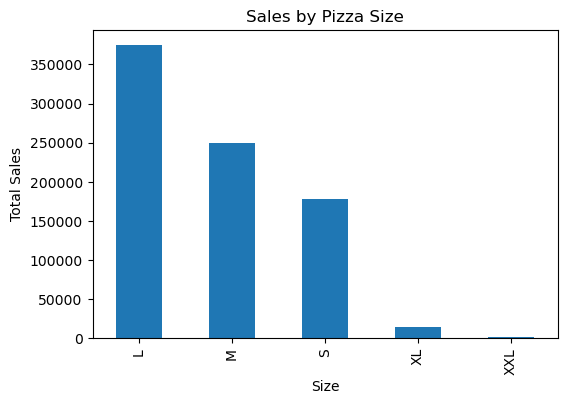

 Most Popular Size: L ($375,319)
 Least Popular Size: XXL ($1,007)



In [16]:
#5) Sales by Pizza Size
size_sales = data.groupby('pizza_size')['sales'].sum()

plt.figure(figsize=(6,4))
size_sales.plot(kind='bar')
plt.title("Sales by Pizza Size")
plt.xlabel("Size")
plt.ylabel("Total Sales")
plt.show()

print(f" Most Popular Size: {size_sales.idxmax()} (${size_sales.max():,.0f})")
print(f" Least Popular Size: {size_sales.idxmin()} (${size_sales.min():,.0f})\n")
